## Types of Books/Genres: Unique Types and Most Frequent

---

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 


In [2]:
# Read the data
books_data = pd.read_csv("cleaned_data.csv")

books_data.head(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0


In [3]:
# Analalyse the data
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6599 non-null   int64  
 1   isbn10          6599 non-null   object 
 2   title           6599 non-null   object 
 3   subtitle        2316 non-null   object 
 4   authors         6599 non-null   object 
 5   categories      6599 non-null   object 
 6   thumbnail       6340 non-null   object 
 7   description     6411 non-null   object 
 8   published_year  6599 non-null   float64
 9   average_rating  6599 non-null   float64
 10  num_pages       6599 non-null   float64
 11  ratings_count   6599 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 618.8+ KB


In [5]:
# Removing N/A entries from the DataFrame 
books_data = books_data.dropna()
books_data.info()

# Reset the index 
books_data = books_data.reset_index(drop = "True")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          2182 non-null   int64  
 1   isbn10          2182 non-null   object 
 2   title           2182 non-null   object 
 3   subtitle        2182 non-null   object 
 4   authors         2182 non-null   object 
 5   categories      2182 non-null   object 
 6   thumbnail       2182 non-null   object 
 7   description     2182 non-null   object 
 8   published_year  2182 non-null   float64
 9   average_rating  2182 non-null   float64
 10  num_pages       2182 non-null   float64
 11  ratings_count   2182 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 204.7+ KB


In [6]:
# Display the filtered data
books_data[['published_year', 'categories']].head()

,published_year,categories
0,2000.0,Detective and mystery stories
1,1998.0,"Africa, East"
2,1994.0,"Hyland, Morn (Fictitious character)"
3,1997.0,"Detective and mystery stories, English"
4,2000.0,Ireland


In [26]:
# Finding the number of unique genres
genre_count = books_data['categories'].nunique()

genre_count

187

In [27]:
# Finding the number of unique genres
unique_genres = books_data['categories'].unique()

unique_genres

array(['Detective and mystery stories', 'Africa, East',
       'Hyland, Morn (Fictitious character)',
       'Detective and mystery stories, English', 'Ireland',
       "Children's stories, English", 'Literary Collections',
       'Imaginary wars and battles',
       'Characters and characteristics in motion pictures',
       'Fantasy fiction', 'Hallucinogenic drugs', 'Fiction',
       'Baggins, Frodo (Fictitious character)', 'Authors',
       'Conduct of life', 'Alienation (Social psychology)', 'Cowboys',
       'History', 'Juvenile Fiction', 'Literary Criticism', 'Science',
       'Biography & Autobiography', 'Family & Relationships',
       'Juvenile Nonfiction', 'Business & Economics', 'Poetry',
       'Self-Help', 'Sports & Recreation', 'True Crime', 'Psychology',
       'Religion', 'Travel', 'Social Science', 'Health & Fitness',
       'Music', 'Political science', 'Medical', 'Philosophy',
       'Body, Mind & Spirit', 'Language Arts & Disciplines', 'Education',
       'Political

In [7]:
# Exploding the genres column 
genre_data = books_data.explode('categories')

# Grouping by release year and genres, then counting
genre_count_over_years = genre_data.groupby(['published_year', 'categories']).size().reset_index(name='count')

In [8]:
# Calculate the total count for each genre
total_count_per_genre = genre_count_over_years.groupby('categories')['count'].sum()

total_count_per_genre

categories
Adult children                 1
Adultery                       2
Adventure stories              2
Africa, East                   1
Alcestis (Greek mythology)     1
                              ..
Travel                        19
Trials (Witchcraft)            1
True Crime                     6
Young Adult Fiction            3
Zero (The number)              1
Name: count, Length: 187, dtype: int64

In [9]:
# Identify the top 10 genres based on the total count
top_10_genres = total_count_per_genre.nlargest(10)

# Convert to a DataFrame 
top_10_genres_df = top_10_genres.reset_index().set_index('categories')
top_10_genres_df

,count
categories,
Fiction,595
Biography & Autobiography,247
History,162
Religion,81
Juvenile Fiction,68
Literary Criticism,60
Philosophy,59
Business & Economics,47
Science,41


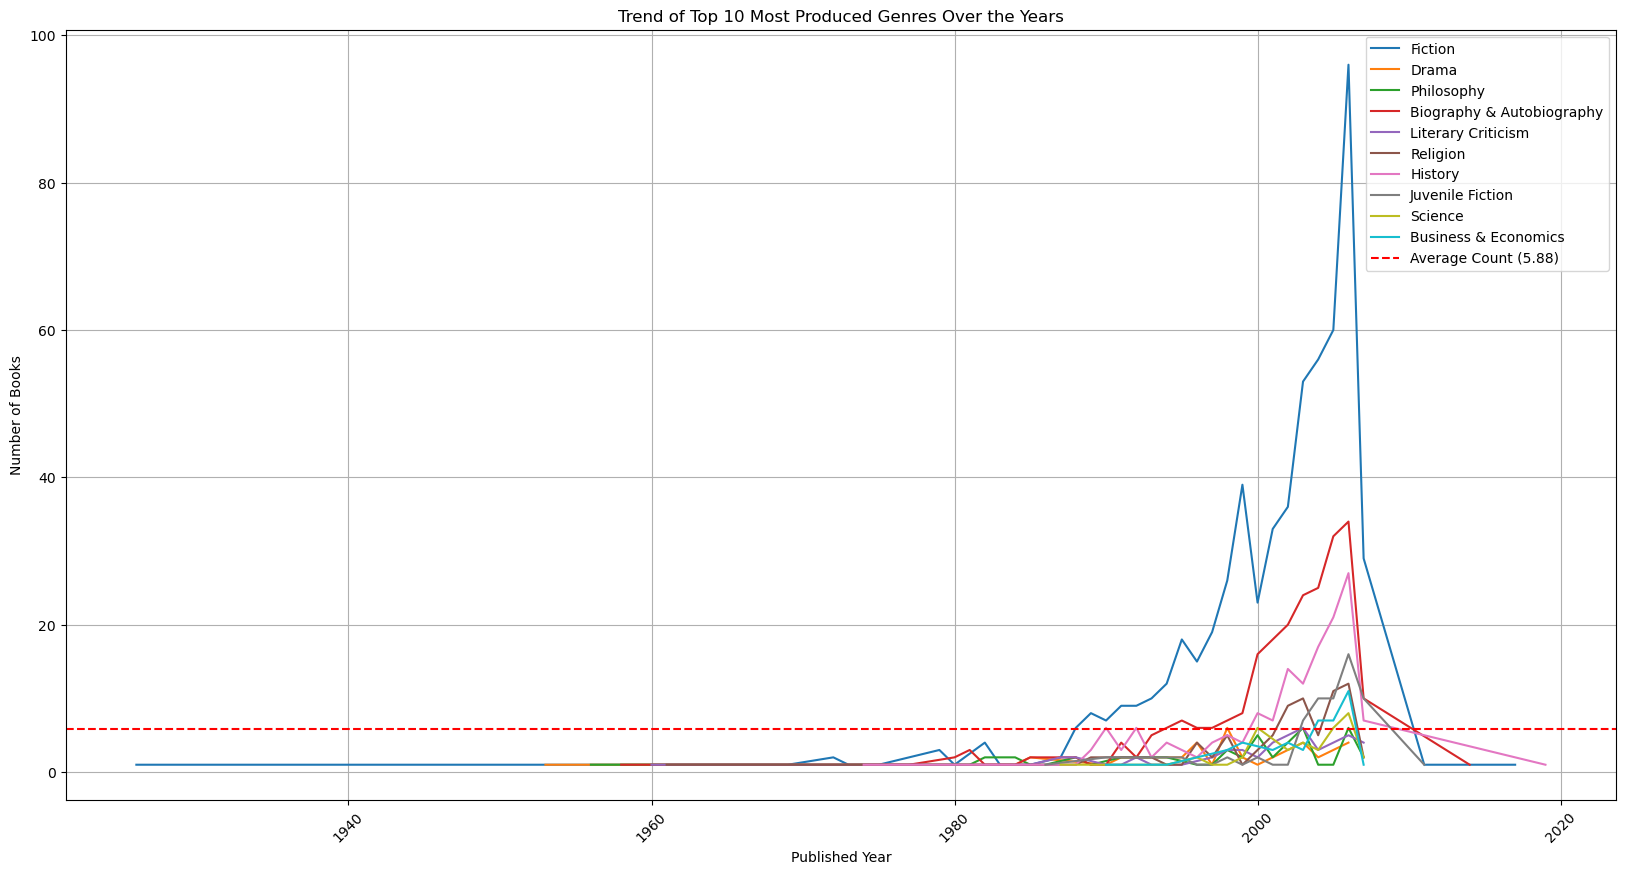

In [30]:
#Plot a line graph to show the trends in the top ten genres

# Filter the dataset to include only the top 10 genres
top_genres_data = genre_count_over_years[genre_count_over_years['categories'].isin(top_10_genres.index)]

# Calculate the average count of shows for the top 10 genres
average_count_top_genres = top_genres_data['count'].mean()

# Plotting the trend of the top 10 genres over the years
plt.figure(figsize=(20, 10))
sns.lineplot(data=top_genres_data, x="published_year", y="count", hue="categories")
plt.title('Trend of Top 10 Most Produced Genres Over the Years')
plt.xlabel('Published Year')
plt.ylabel('Number of Books')
plt.legend(title='Top 10 Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)

# Adding a horizontal line at the average count
plt.axhline(y=average_count_top_genres, color='red', linestyle='--', label=f'Average Count ({average_count_top_genres:.2f})')
plt.legend()

# Show the plot
plt.show()

- Average is skewed due to low numbers before 1980, filtering the data may show accurate and more relevant results

In [31]:
# Filter out data below 1980
filtered_data = books_data.loc[books_data['published_year']>=1980]
filtered_data = filtered_data.reset_index(drop=True)
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          2115 non-null   int64  
 1   isbn10          2115 non-null   object 
 2   title           2115 non-null   object 
 3   subtitle        2115 non-null   object 
 4   authors         2115 non-null   object 
 5   categories      2115 non-null   object 
 6   thumbnail       2115 non-null   object 
 7   description     2115 non-null   object 
 8   published_year  2115 non-null   float64
 9   average_rating  2115 non-null   float64
 10  num_pages       2115 non-null   float64
 11  ratings_count   2115 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 198.4+ KB


In [38]:
# Display the filtered data
filtered_data[['published_year', 'categories']].head()

,published_year,categories
0,2000.0,Detective and mystery stories
1,1998.0,"Africa, East"
2,1994.0,"Hyland, Morn (Fictitious character)"
3,1997.0,"Detective and mystery stories, English"
4,2000.0,Ireland


In [39]:
# Exploding the genres column 
genre_data = filtered_data.explode('categories')

# Grouping by release year and genres, then counting
genre_count_over_years = genre_data.groupby(['published_year', 'categories']).size().reset_index(name='count')

In [40]:
# Calculate the total count for each genre
total_count_per_genre = genre_count_over_years.groupby('categories')['count'].sum()

total_count_per_genre

categories
Adult children                 1
Adultery                       2
Adventure stories              2
Africa, East                   1
Alcestis (Greek mythology)     1
                              ..
Travel                        19
Trials (Witchcraft)            1
True Crime                     5
Young Adult Fiction            3
Zero (The number)              1
Name: count, Length: 183, dtype: int64

In [41]:
# Identify the top 10 genres based on the total count
top_10_genres = total_count_per_genre.nlargest(10)

# Convert to a DataFrame 
top_10_genres_df = top_10_genres.reset_index().set_index('categories')
top_10_genres_df

,count
categories,
Fiction,576
Biography & Autobiography,245
History,160
Religion,78
Juvenile Fiction,68
Literary Criticism,54
Philosophy,52
Business & Economics,47
Science,41


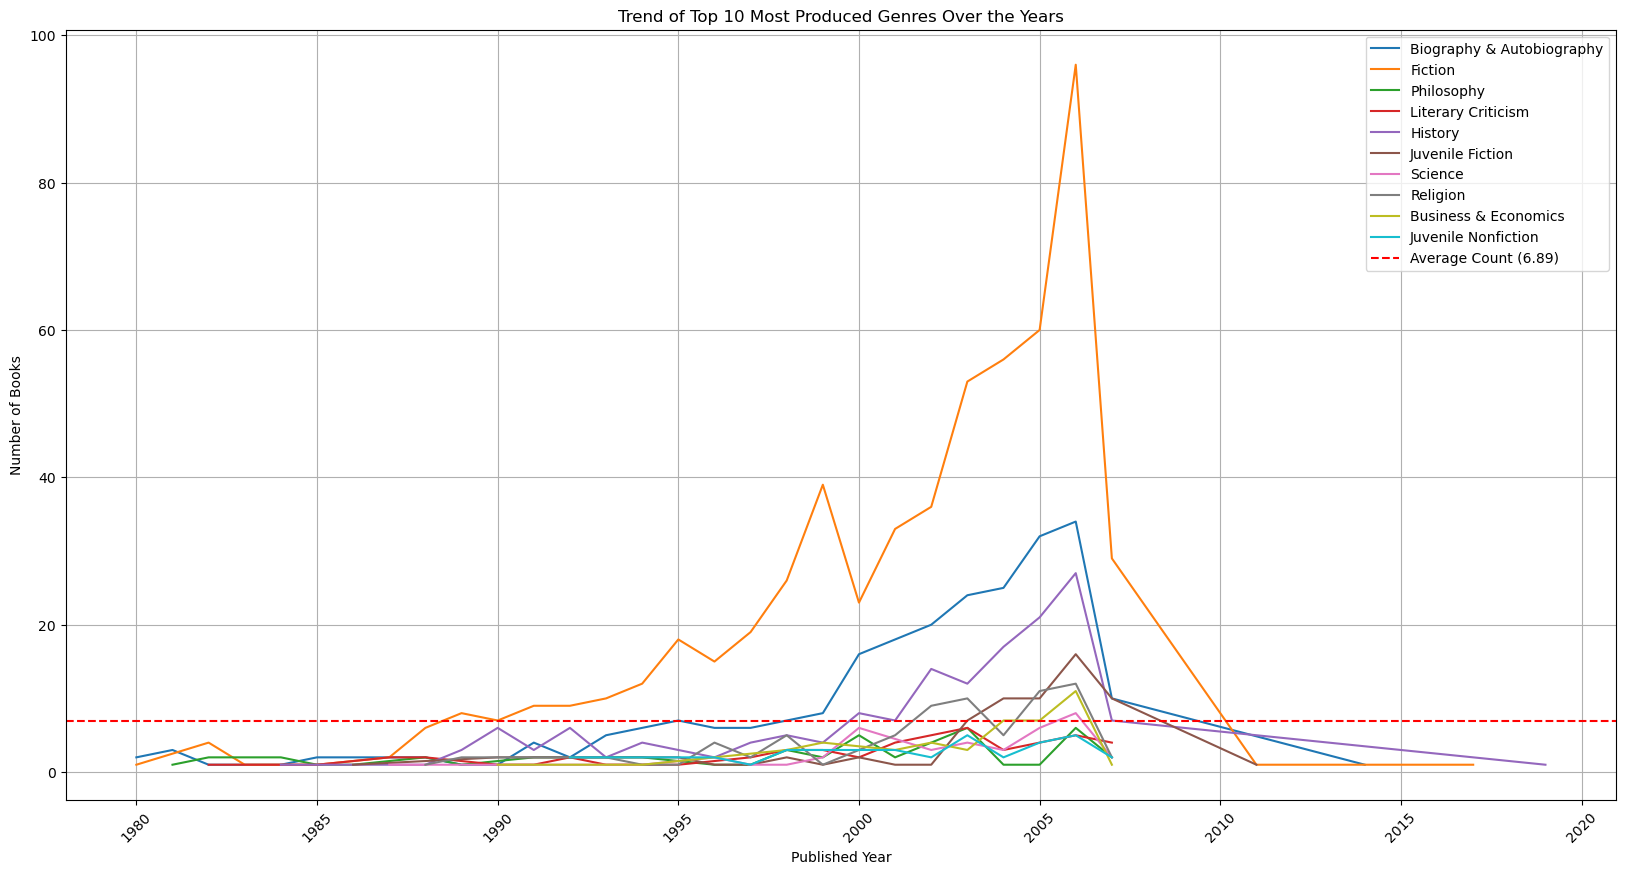

In [42]:
# Plot graph again

# Filter the dataset to include only the top 10 genres
top_genres_data = genre_count_over_years[genre_count_over_years['categories'].isin(top_10_genres.index)]

# Calculate the average count of shows for the top 10 genres
average_count_top_genres = top_genres_data['count'].mean()

# Plotting the trend of the top 10 genres over the years
plt.figure(figsize=(20, 10))
sns.lineplot(data=top_genres_data, x="published_year", y="count", hue="categories")
plt.title('Trend of Top 10 Most Produced Genres Over the Years')
plt.xlabel('Published Year')
plt.ylabel('Number of Books')
plt.legend(title='Top 10 Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)

# Adding a horizontal line at the average count
plt.axhline(y=average_count_top_genres, color='red', linestyle='--', label=f'Average Count ({average_count_top_genres:.2f})')
plt.legend()

# Show the plot
plt.show()